In [1]:
import operator
import struct
#导入线性代数库
import numpy as np
#训练集文件名
train_images_idx3_ubyte_file = 'train-images.idx3-ubyte'
#训练集标签文件名
train_labels_idx1_ubyte_file = 'train-labels.idx1-ubyte'
#测试集文件名
test_images_idx3_ubyte_file = 't10k-images.idx3-ubyte'
#测试集标签文件名
test_labels_idx1_ubyte_file = 't10k-labels.idx1-ubyte'

In [2]:
#数据集解析函数
def decode_idx3_ubyte(idx3_ubyte_file):
    bin_data = open(idx3_ubyte_file, 'rb').read()
    #解析文件头信息，依次为校验数、图片数、图片高、图片宽
    offset = 0
    fmt_header = '>iiii'
    magic_number, num_images, num_rows, num_cols = struct.unpack_from(fmt_header, bin_data, offset)
    #解析数据集
    image_size = num_rows * num_cols
    offset += struct.calcsize(fmt_header)
    fmt_image = '>' + str(image_size) + 'B'
    images = np.empty((num_images, num_rows, num_cols))
    for i in range(num_images):
        images[i] = np.array(struct.unpack_from(fmt_image, bin_data, offset)).reshape((num_rows, num_cols))
        offset += struct.calcsize(fmt_image)
    return images

In [3]:
#标签集解析函数
def decode_idx1_ubyte(idx1_ubyte_file):
    bin_data = open(idx1_ubyte_file, 'rb').read()
    #解析文件头信息，依次为校验数、标签数
    offset = 0
    fmt_header = '>ii'
    magic_number, num_labels = struct.unpack_from(fmt_header, bin_data, offset)
    #解析标签集
    offset += struct.calcsize(fmt_header)
    fmt_label = '>B'
    labels = np.empty(num_labels)
    for i in range(num_labels):
        labels[i] = struct.unpack_from(fmt_label, bin_data, offset)[0]
        offset += struct.calcsize(fmt_label)
    return labels

In [4]:

def classify(inX, dataset, labels, k):
    #inX测试向量，dataset训练矩阵，labels训练标签数组，k最近邻个数
    datasetsize = dataset.shape[0]
    #28*28维距离计算，矩阵方式实现
    #第1步：特征向量求差
    diffMat = np.tile(inX, (datasetsize, 1)) - dataset
    #第2步：求差的平方
    squareDiffMat = diffMat * diffMat
    #第3步：行序求和，即平方和
    squareDistances = squareDiffMat.sum(axis=1)
    #第4步：开根号，获得28*28维特征值距离向量
    distances = squareDistances ** 0.5
    #距离从大到小排序，返回距离的序号
    sortedOrders = distances.argsort()
    while k > 0:
        print("测试近邻数k=%d" % k)
        #构建次数统计表
        classCount = {}
        #取前k个距离最小的
        for i in range(k):
            #sortedOrders[0]是距离最小的数据样本的序号
            #labels[sortedOrders[0]]是距离最小的数据样本的标签
            votelabel = labels[sortedOrders[i]]
            #统计标签0-9出现次数
            classCount[votelabel] = classCount.get(votelabel, 0) + 1
            print(classCount)  #显示统计表
        #排序
        sortedClassCount = sorted(classCount.items(), key = operator.itemgetter(1), reverse = True)
        print(sortedClassCount)  #显示降序统计表
        #测试是否出现Tie近邻平分状态
        if (len(sortedClassCount) == 1 or sortedClassCount[0][1] != sortedClassCount[1][1]):
            return sortedClassCount[0][0]
        k -= 1
        print("降低近邻数重启k=%d" % k)

In [5]:
if __name__ == '__main__':
    train_images = decode_idx3_ubyte(train_images_idx3_ubyte_file)
    train_labels = decode_idx1_ubyte(train_labels_idx1_ubyte_file)
    test_images = decode_idx3_ubyte(test_images_idx3_ubyte_file)
    test_labels = decode_idx1_ubyte(test_labels_idx1_ubyte_file)
    #创建一个读入数据的数组，进行图片特征提取
    m = 60000
    trainingMat = np.zeros((m, 784))  #784 = 28 * 28，这是图片特征向量的维度
    for i in range(m):
        for j in range(28):
            for k in range(28):
                trainingMat[i, 28 * j + k] = train_images[i][j][k]
    errorRateRef = []
    knn = 1
    maxKnn = 13
    while knn <= maxKnn:
        errorCount = 0.0
        mCheck = 10000
        for i in range(mCheck):
            classNumStr = test_labels[i]
            vectorUnderTest = np.zeros(784)
            for j in range(28):
                for k in range(28):
                    vectorUnderTest[28 * j + k] = test_images[i][j][k]  #第i幅测试图
            Result = classify(vectorUnderTest, trainingMat, train_labels, knn)
            print("识别结果: %d 正确答案: %d" % (Result, classNumStr))
            if(Result != classNumStr):
                errorCount += 1.0
                print("错误")
        errorRate = errorCount / float(mCheck)
        print("近邻数k=%d" % knn)
        print("错误数: %d" % errorCount)
        print("错误率: %f" % errorRate)
        print("第%d轮测试结束\n" % ((knn + 1) / 2))
        errorRateRef.append(knn)
        errorRateRef.append(errorRate)
        knn += 1
    print(errorRateRef)


测试近邻数k=1
{7.0: 1}
[(7.0, 1)]
识别结果: 7 正确答案: 7
测试近邻数k=1
{2.0: 1}
[(2.0, 1)]
识别结果: 2 正确答案: 2
测试近邻数k=1
{1.0: 1}
[(1.0, 1)]
识别结果: 1 正确答案: 1
测试近邻数k=1
{0.0: 1}
[(0.0, 1)]
识别结果: 0 正确答案: 0
测试近邻数k=1
{4.0: 1}
[(4.0, 1)]
识别结果: 4 正确答案: 4
测试近邻数k=1
{1.0: 1}
[(1.0, 1)]
识别结果: 1 正确答案: 1
测试近邻数k=1
{4.0: 1}
[(4.0, 1)]
识别结果: 4 正确答案: 4
测试近邻数k=1
{9.0: 1}
[(9.0, 1)]
识别结果: 9 正确答案: 9
测试近邻数k=1
{5.0: 1}
[(5.0, 1)]
识别结果: 5 正确答案: 5
测试近邻数k=1
{9.0: 1}
[(9.0, 1)]
识别结果: 9 正确答案: 9
测试近邻数k=1
{0.0: 1}
[(0.0, 1)]
识别结果: 0 正确答案: 0
测试近邻数k=1
{6.0: 1}
[(6.0, 1)]
识别结果: 6 正确答案: 6
测试近邻数k=1
{9.0: 1}
[(9.0, 1)]
识别结果: 9 正确答案: 9
测试近邻数k=1
{0.0: 1}
[(0.0, 1)]
识别结果: 0 正确答案: 0
测试近邻数k=1
{1.0: 1}
[(1.0, 1)]
识别结果: 1 正确答案: 1
测试近邻数k=1
{5.0: 1}
[(5.0, 1)]
识别结果: 5 正确答案: 5
测试近邻数k=1
{9.0: 1}
[(9.0, 1)]
识别结果: 9 正确答案: 9
测试近邻数k=1
{7.0: 1}
[(7.0, 1)]
识别结果: 7 正确答案: 7
测试近邻数k=1
{3.0: 1}
[(3.0, 1)]
识别结果: 3 正确答案: 3
测试近邻数k=1
{4.0: 1}
[(4.0, 1)]
识别结果: 4 正确答案: 4
测试近邻数k=1
{9.0: 1}
[(9.0, 1)]
识别结果: 9 正确答案: 9
测试近邻数k=1
{6.0: 1}
[(6.0, 1)]
识别结果: 6 正确答案: 6
测试近邻数k=1
{

测试近邻数k=2
{4.0: 1}
{4.0: 1, 9.0: 1}
[(4.0, 1), (9.0, 1)]
降低近邻数重启k=1
测试近邻数k=1
{4.0: 1}
[(4.0, 1)]
识别结果: 4 正确答案: 4
测试近邻数k=2
{6.0: 1}
{6.0: 2}
[(6.0, 2)]
识别结果: 6 正确答案: 6
测试近邻数k=2
{4.0: 1}
{4.0: 2}
[(4.0, 2)]
识别结果: 4 正确答案: 4
测试近邻数k=2
{3.0: 1}
{3.0: 2}
[(3.0, 2)]
识别结果: 3 正确答案: 3
测试近邻数k=2
{0.0: 1}
{0.0: 2}
[(0.0, 2)]
识别结果: 0 正确答案: 0
测试近邻数k=2
{7.0: 1}
{7.0: 2}
[(7.0, 2)]
识别结果: 7 正确答案: 7
测试近邻数k=2
{0.0: 1}
{0.0: 2}
[(0.0, 2)]
识别结果: 0 正确答案: 0
测试近邻数k=2
{2.0: 1}
{2.0: 2}
[(2.0, 2)]
识别结果: 2 正确答案: 2
测试近邻数k=2
{9.0: 1}
{9.0: 2}
[(9.0, 2)]
识别结果: 9 正确答案: 9
测试近邻数k=2
{1.0: 1}
{1.0: 2}
[(1.0, 2)]
识别结果: 1 正确答案: 1
测试近邻数k=2
{7.0: 1}
{7.0: 2}
[(7.0, 2)]
识别结果: 7 正确答案: 7
测试近邻数k=2
{3.0: 1}
{3.0: 2}
[(3.0, 2)]
识别结果: 3 正确答案: 3
测试近邻数k=2
{2.0: 1}
{2.0: 2}
[(2.0, 2)]
识别结果: 2 正确答案: 2
测试近邻数k=2
{9.0: 1}
{9.0: 2}
[(9.0, 2)]
识别结果: 9 正确答案: 9
测试近邻数k=2
{7.0: 1}
{7.0: 2}
[(7.0, 2)]
识别结果: 7 正确答案: 7
测试近邻数k=2
{7.0: 1}
{7.0: 2}
[(7.0, 2)]
识别结果: 7 正确答案: 7
测试近邻数k=2
{6.0: 1}
{6.0: 2}
[(6.0, 2)]
识别结果: 6 正确答案: 6
测试近邻数k=2
{2.0: 1}
{2.0: 

测试近邻数k=3
{1.0: 1}
{1.0: 2}
{1.0: 3}
[(1.0, 3)]
识别结果: 1 正确答案: 1
测试近邻数k=3
{7.0: 1}
{7.0: 2}
{7.0: 3}
[(7.0, 3)]
识别结果: 7 正确答案: 7
测试近邻数k=3
{6.0: 1}
{6.0: 2}
{6.0: 3}
[(6.0, 3)]
识别结果: 6 正确答案: 6
测试近邻数k=3
{9.0: 1}
{9.0: 2}
{9.0: 3}
[(9.0, 3)]
识别结果: 9 正确答案: 9
近邻数k=3
错误数: 1
错误率: 0.010000
第2轮测试结束

测试近邻数k=4
{7.0: 1}
{7.0: 2}
{7.0: 3}
{7.0: 4}
[(7.0, 4)]
识别结果: 7 正确答案: 7
测试近邻数k=4
{2.0: 1}
{2.0: 2}
{2.0: 3}
{2.0: 4}
[(2.0, 4)]
识别结果: 2 正确答案: 2
测试近邻数k=4
{1.0: 1}
{1.0: 2}
{1.0: 3}
{1.0: 4}
[(1.0, 4)]
识别结果: 1 正确答案: 1
测试近邻数k=4
{0.0: 1}
{0.0: 2}
{0.0: 3}
{0.0: 4}
[(0.0, 4)]
识别结果: 0 正确答案: 0
测试近邻数k=4
{4.0: 1}
{4.0: 2}
{4.0: 3}
{4.0: 4}
[(4.0, 4)]
识别结果: 4 正确答案: 4
测试近邻数k=4
{1.0: 1}
{1.0: 2}
{1.0: 3}
{1.0: 4}
[(1.0, 4)]
识别结果: 1 正确答案: 1
测试近邻数k=4
{4.0: 1}
{4.0: 2}
{4.0: 3}
{4.0: 4}
[(4.0, 4)]
识别结果: 4 正确答案: 4
测试近邻数k=4
{9.0: 1}
{9.0: 2}
{9.0: 3}
{9.0: 4}
[(9.0, 4)]
识别结果: 9 正确答案: 9
测试近邻数k=4
{5.0: 1}
{5.0: 2}
{5.0: 3}
{5.0: 4}
[(5.0, 4)]
识别结果: 5 正确答案: 5
测试近邻数k=4
{9.0: 1}
{9.0: 2}
{9.0: 3}
{9.0: 4}
[(9.0, 4)]
识别结果: 9

测试近邻数k=5
{0.0: 1}
{0.0: 2}
{0.0: 3}
{0.0: 4}
{0.0: 5}
[(0.0, 5)]
识别结果: 0 正确答案: 0
测试近邻数k=5
{4.0: 1}
{4.0: 2}
{4.0: 3}
{4.0: 4}
{4.0: 5}
[(4.0, 5)]
识别结果: 4 正确答案: 4
测试近邻数k=5
{1.0: 1}
{1.0: 2}
{1.0: 3}
{1.0: 4}
{1.0: 5}
[(1.0, 5)]
识别结果: 1 正确答案: 1
测试近邻数k=5
{4.0: 1}
{4.0: 2}
{4.0: 3}
{4.0: 4}
{4.0: 5}
[(4.0, 5)]
识别结果: 4 正确答案: 4
测试近邻数k=5
{9.0: 1}
{9.0: 2}
{9.0: 3}
{9.0: 4}
{9.0: 5}
[(9.0, 5)]
识别结果: 9 正确答案: 9
测试近邻数k=5
{5.0: 1}
{5.0: 2}
{5.0: 3}
{5.0: 4}
{5.0: 5}
[(5.0, 5)]
识别结果: 5 正确答案: 5
测试近邻数k=5
{9.0: 1}
{9.0: 2}
{9.0: 3}
{9.0: 4}
{9.0: 5}
[(9.0, 5)]
识别结果: 9 正确答案: 9
测试近邻数k=5
{0.0: 1}
{0.0: 2}
{0.0: 3}
{0.0: 4}
{0.0: 5}
[(0.0, 5)]
识别结果: 0 正确答案: 0
测试近邻数k=5
{6.0: 1}
{6.0: 2}
{6.0: 3}
{6.0: 4}
{6.0: 5}
[(6.0, 5)]
识别结果: 6 正确答案: 6
测试近邻数k=5
{9.0: 1}
{9.0: 2}
{9.0: 3}
{9.0: 4}
{9.0: 5}
[(9.0, 5)]
识别结果: 9 正确答案: 9
测试近邻数k=5
{0.0: 1}
{0.0: 2}
{0.0: 3}
{0.0: 4}
{0.0: 5}
[(0.0, 5)]
识别结果: 0 正确答案: 0
测试近邻数k=5
{1.0: 1}
{1.0: 2}
{1.0: 3}
{1.0: 4}
{1.0: 5}
[(1.0, 5)]
识别结果: 1 正确答案: 1
测试近邻数k=5
{5.0: 1}
{5.0: 2}
{

测试近邻数k=6
{7.0: 1}
{7.0: 2}
{7.0: 3}
{7.0: 4}
{7.0: 5}
{7.0: 6}
[(7.0, 6)]
识别结果: 7 正确答案: 7
测试近邻数k=6
{2.0: 1}
{2.0: 2}
{2.0: 3}
{2.0: 4}
{2.0: 5}
{2.0: 6}
[(2.0, 6)]
识别结果: 2 正确答案: 2
测试近邻数k=6
{1.0: 1}
{1.0: 2}
{1.0: 3}
{1.0: 4}
{1.0: 5}
{1.0: 6}
[(1.0, 6)]
识别结果: 1 正确答案: 1
测试近邻数k=6
{0.0: 1}
{0.0: 2}
{0.0: 3}
{0.0: 4}
{0.0: 5}
{0.0: 6}
[(0.0, 6)]
识别结果: 0 正确答案: 0
测试近邻数k=6
{4.0: 1}
{4.0: 2}
{4.0: 3}
{4.0: 4}
{4.0: 5}
{4.0: 6}
[(4.0, 6)]
识别结果: 4 正确答案: 4
测试近邻数k=6
{1.0: 1}
{1.0: 2}
{1.0: 3}
{1.0: 4}
{1.0: 5}
{1.0: 6}
[(1.0, 6)]
识别结果: 1 正确答案: 1
测试近邻数k=6
{4.0: 1}
{4.0: 2}
{4.0: 3}
{4.0: 4}
{4.0: 5}
{4.0: 5, 9.0: 1}
[(4.0, 5), (9.0, 1)]
识别结果: 4 正确答案: 4
测试近邻数k=6
{9.0: 1}
{9.0: 2}
{9.0: 3}
{9.0: 4}
{9.0: 5}
{9.0: 6}
[(9.0, 6)]
识别结果: 9 正确答案: 9
测试近邻数k=6
{5.0: 1}
{5.0: 2}
{5.0: 3}
{5.0: 4}
{5.0: 5}
{5.0: 6}
[(5.0, 6)]
识别结果: 5 正确答案: 5
测试近邻数k=6
{9.0: 1}
{9.0: 2}
{9.0: 3}
{9.0: 4}
{9.0: 5}
{9.0: 6}
[(9.0, 6)]
识别结果: 9 正确答案: 9
测试近邻数k=6
{0.0: 1}
{0.0: 2}
{0.0: 3}
{0.0: 4}
{0.0: 5}
{0.0: 6}
[(0.0, 6)]
识别结果: 0 

测试近邻数k=6
{8.0: 1}
{8.0: 2}
{8.0: 3}
{8.0: 4}
{8.0: 5}
{8.0: 6}
[(8.0, 6)]
识别结果: 8 正确答案: 8
测试近邻数k=6
{4.0: 1}
{4.0: 2}
{4.0: 3}
{4.0: 4}
{4.0: 5}
{4.0: 6}
[(4.0, 6)]
识别结果: 4 正确答案: 4
测试近邻数k=6
{7.0: 1}
{7.0: 2}
{7.0: 3}
{7.0: 4}
{7.0: 5}
{7.0: 6}
[(7.0, 6)]
识别结果: 7 正确答案: 7
测试近邻数k=6
{3.0: 1}
{3.0: 2}
{3.0: 3}
{3.0: 4}
{3.0: 5}
{3.0: 6}
[(3.0, 6)]
识别结果: 3 正确答案: 3
测试近邻数k=6
{6.0: 1}
{6.0: 2}
{6.0: 3}
{6.0: 4}
{6.0: 5}
{6.0: 6}
[(6.0, 6)]
识别结果: 6 正确答案: 6
测试近邻数k=6
{1.0: 1}
{1.0: 2}
{1.0: 3}
{1.0: 4}
{1.0: 5}
{1.0: 6}
[(1.0, 6)]
识别结果: 1 正确答案: 1
测试近邻数k=6
{3.0: 1}
{3.0: 2}
{3.0: 3}
{3.0: 4}
{3.0: 5}
{3.0: 6}
[(3.0, 6)]
识别结果: 3 正确答案: 3
测试近邻数k=6
{6.0: 1}
{6.0: 2}
{6.0: 3}
{6.0: 4}
{6.0: 5}
{6.0: 6}
[(6.0, 6)]
识别结果: 6 正确答案: 6
测试近邻数k=6
{9.0: 1}
{9.0: 1, 4.0: 1}
{9.0: 2, 4.0: 1}
{9.0: 3, 4.0: 1}
{9.0: 4, 4.0: 1}
{9.0: 4, 4.0: 2}
[(9.0, 4), (4.0, 2)]
识别结果: 9 正确答案: 9
测试近邻数k=6
{3.0: 1}
{3.0: 2}
{3.0: 3}
{3.0: 4}
{3.0: 5}
{3.0: 5, 5.0: 1}
[(3.0, 5), (5.0, 1)]
识别结果: 3 正确答案: 3
测试近邻数k=6
{1.0: 1}
{1.0: 2}
{1.0:

测试近邻数k=7
{4.0: 1}
{4.0: 1, 9.0: 1}
{4.0: 1, 9.0: 2}
{4.0: 2, 9.0: 2}
{4.0: 3, 9.0: 2}
{4.0: 4, 9.0: 2}
{4.0: 5, 9.0: 2}
[(4.0, 5), (9.0, 2)]
识别结果: 4 正确答案: 4
测试近邻数k=7
{6.0: 1}
{6.0: 2}
{6.0: 3}
{6.0: 4}
{6.0: 5}
{6.0: 6}
{6.0: 7}
[(6.0, 7)]
识别结果: 6 正确答案: 6
测试近邻数k=7
{4.0: 1}
{4.0: 2}
{4.0: 3}
{4.0: 4}
{4.0: 5}
{4.0: 6}
{4.0: 7}
[(4.0, 7)]
识别结果: 4 正确答案: 4
测试近邻数k=7
{3.0: 1}
{3.0: 2}
{3.0: 3}
{3.0: 4}
{3.0: 5}
{3.0: 6}
{3.0: 7}
[(3.0, 7)]
识别结果: 3 正确答案: 3
测试近邻数k=7
{0.0: 1}
{0.0: 2}
{0.0: 3}
{0.0: 4}
{0.0: 5}
{0.0: 6}
{0.0: 7}
[(0.0, 7)]
识别结果: 0 正确答案: 0
测试近邻数k=7
{7.0: 1}
{7.0: 2}
{7.0: 3}
{7.0: 4}
{7.0: 5}
{7.0: 6}
{7.0: 7}
[(7.0, 7)]
识别结果: 7 正确答案: 7
测试近邻数k=7
{0.0: 1}
{0.0: 2}
{0.0: 3}
{0.0: 4}
{0.0: 5}
{0.0: 6}
{0.0: 7}
[(0.0, 7)]
识别结果: 0 正确答案: 0
测试近邻数k=7
{2.0: 1}
{2.0: 2}
{2.0: 3}
{2.0: 4}
{2.0: 5}
{2.0: 6}
{2.0: 7}
[(2.0, 7)]
识别结果: 2 正确答案: 2
测试近邻数k=7
{9.0: 1}
{9.0: 2}
{9.0: 3}
{9.0: 3, 7.0: 1}
{9.0: 4, 7.0: 1}
{9.0: 5, 7.0: 1}
{9.0: 5, 7.0: 2}
[(9.0, 5), (7.0, 2)]
识别结果: 9 正确答案: 9
测试近邻数k=7


测试近邻数k=8
{2.0: 1}
{2.0: 2}
{2.0: 3}
{2.0: 4}
{2.0: 4, 3.0: 1}
{2.0: 5, 3.0: 1}
{2.0: 5, 3.0: 2}
{2.0: 5, 3.0: 2, 1.0: 1}
[(2.0, 5), (3.0, 2), (1.0, 1)]
识别结果: 2 正确答案: 2
测试近邻数k=8
{1.0: 1}
{1.0: 2}
{1.0: 3}
{1.0: 4}
{1.0: 5}
{1.0: 6}
{1.0: 7}
{1.0: 8}
[(1.0, 8)]
识别结果: 1 正确答案: 1
测试近邻数k=8
{1.0: 1}
{1.0: 2}
{1.0: 3}
{1.0: 4}
{1.0: 5}
{1.0: 6}
{1.0: 7}
{1.0: 8}
[(1.0, 8)]
识别结果: 1 正确答案: 1
测试近邻数k=8
{7.0: 1}
{7.0: 2}
{7.0: 3}
{7.0: 4}
{7.0: 5}
{7.0: 6}
{7.0: 7}
{7.0: 8}
[(7.0, 8)]
识别结果: 7 正确答案: 7
测试近邻数k=8
{4.0: 1}
{4.0: 2}
{4.0: 3}
{4.0: 4}
{4.0: 5}
{4.0: 6}
{4.0: 7}
{4.0: 8}
[(4.0, 8)]
识别结果: 4 正确答案: 4
测试近邻数k=8
{2.0: 1}
{2.0: 2}
{2.0: 3}
{2.0: 4}
{2.0: 4, 1.0: 1}
{2.0: 4, 1.0: 2}
{2.0: 4, 1.0: 3}
{2.0: 4, 1.0: 4}
[(2.0, 4), (1.0, 4)]
降低近邻数重启k=7
测试近邻数k=7
{2.0: 1}
{2.0: 2}
{2.0: 3}
{2.0: 4}
{2.0: 4, 1.0: 1}
{2.0: 4, 1.0: 2}
{2.0: 4, 1.0: 3}
[(2.0, 4), (1.0, 3)]
识别结果: 2 正确答案: 2
测试近邻数k=8
{3.0: 1}
{3.0: 2}
{3.0: 3}
{3.0: 4}
{3.0: 5}
{3.0: 6}
{3.0: 7}
{3.0: 8}
[(3.0, 8)]
识别结果: 3 正确答案: 3
测试近邻数k=8
{5.0:

测试近邻数k=9
{5.0: 1}
{5.0: 2}
{5.0: 3}
{5.0: 4}
{5.0: 5}
{5.0: 6}
{5.0: 6, 9.0: 1}
{5.0: 7, 9.0: 1}
{5.0: 7, 9.0: 2}
[(5.0, 7), (9.0, 2)]
识别结果: 5 正确答案: 5
测试近邻数k=9
{9.0: 1}
{9.0: 2}
{9.0: 3}
{9.0: 4}
{9.0: 5}
{9.0: 6}
{9.0: 7}
{9.0: 8}
{9.0: 9}
[(9.0, 9)]
识别结果: 9 正确答案: 9
测试近邻数k=9
{0.0: 1}
{0.0: 2}
{0.0: 3}
{0.0: 4}
{0.0: 5}
{0.0: 6}
{0.0: 7}
{0.0: 8}
{0.0: 9}
[(0.0, 9)]
识别结果: 0 正确答案: 0
测试近邻数k=9
{6.0: 1}
{6.0: 2}
{6.0: 3}
{6.0: 4}
{6.0: 5}
{6.0: 6}
{6.0: 7}
{6.0: 8}
{6.0: 9}
[(6.0, 9)]
识别结果: 6 正确答案: 6
测试近邻数k=9
{9.0: 1}
{9.0: 2}
{9.0: 3}
{9.0: 4}
{9.0: 5}
{9.0: 6}
{9.0: 7}
{9.0: 8}
{9.0: 9}
[(9.0, 9)]
识别结果: 9 正确答案: 9
测试近邻数k=9
{0.0: 1}
{0.0: 2}
{0.0: 3}
{0.0: 4}
{0.0: 5}
{0.0: 6}
{0.0: 7}
{0.0: 8}
{0.0: 9}
[(0.0, 9)]
识别结果: 0 正确答案: 0
测试近邻数k=9
{1.0: 1}
{1.0: 2}
{1.0: 3}
{1.0: 4}
{1.0: 5}
{1.0: 6}
{1.0: 7}
{1.0: 8}
{1.0: 9}
[(1.0, 9)]
识别结果: 1 正确答案: 1
测试近邻数k=9
{5.0: 1}
{5.0: 2}
{5.0: 3}
{5.0: 4}
{5.0: 5}
{5.0: 6}
{5.0: 7}
{5.0: 7, 3.0: 1}
{5.0: 8, 3.0: 1}
[(5.0, 8), (3.0, 1)]
识别结果: 5 正确答案: 5
测试近邻

测试近邻数k=9
{0.0: 1}
{0.0: 2}
{0.0: 3}
{0.0: 4}
{0.0: 5}
{0.0: 6}
{0.0: 7}
{0.0: 8}
{0.0: 9}
[(0.0, 9)]
识别结果: 0 正确答案: 0
测试近邻数k=9
{2.0: 1}
{2.0: 2}
{2.0: 3}
{2.0: 4}
{2.0: 5}
{2.0: 6}
{2.0: 7}
{2.0: 8}
{2.0: 9}
[(2.0, 9)]
识别结果: 2 正确答案: 2
测试近邻数k=9
{9.0: 1}
{9.0: 2}
{9.0: 3}
{9.0: 3, 7.0: 1}
{9.0: 4, 7.0: 1}
{9.0: 5, 7.0: 1}
{9.0: 5, 7.0: 2}
{9.0: 6, 7.0: 2}
{9.0: 6, 7.0: 3}
[(9.0, 6), (7.0, 3)]
识别结果: 9 正确答案: 9
测试近邻数k=9
{1.0: 1}
{1.0: 2}
{1.0: 3}
{1.0: 4}
{1.0: 5}
{1.0: 6}
{1.0: 7}
{1.0: 8}
{1.0: 9}
[(1.0, 9)]
识别结果: 1 正确答案: 1
测试近邻数k=9
{7.0: 1}
{7.0: 2}
{7.0: 3}
{7.0: 4}
{7.0: 5}
{7.0: 6}
{7.0: 7}
{7.0: 8}
{7.0: 9}
[(7.0, 9)]
识别结果: 7 正确答案: 7
测试近邻数k=9
{3.0: 1}
{3.0: 2}
{3.0: 3}
{3.0: 4}
{3.0: 5}
{3.0: 6}
{3.0: 7}
{3.0: 8}
{3.0: 9}
[(3.0, 9)]
识别结果: 3 正确答案: 3
测试近邻数k=9
{2.0: 1}
{2.0: 2}
{2.0: 3}
{2.0: 3, 7.0: 1}
{2.0: 3, 7.0: 2}
{2.0: 3, 7.0: 3}
{2.0: 3, 7.0: 4}
{2.0: 3, 7.0: 5}
{2.0: 3, 7.0: 6}
[(7.0, 6), (2.0, 3)]
识别结果: 7 正确答案: 2
错误
测试近邻数k=9
{9.0: 1}
{9.0: 2}
{9.0: 3}
{9.0: 4}
{9.0: 5}
{9.0: 6}

测试近邻数k=10
{7.0: 1}
{7.0: 2}
{7.0: 3}
{7.0: 4}
{7.0: 5}
{7.0: 6}
{7.0: 7}
{7.0: 8}
{7.0: 9}
{7.0: 10}
[(7.0, 10)]
识别结果: 7 正确答案: 7
测试近邻数k=10
{2.0: 1}
{2.0: 2}
{2.0: 3}
{2.0: 4}
{2.0: 5}
{2.0: 6}
{2.0: 7}
{2.0: 8}
{2.0: 9}
{2.0: 10}
[(2.0, 10)]
识别结果: 2 正确答案: 2
测试近邻数k=10
{7.0: 1}
{7.0: 2}
{7.0: 3}
{7.0: 4}
{7.0: 5}
{7.0: 6}
{7.0: 7}
{7.0: 8}
{7.0: 9}
{7.0: 10}
[(7.0, 10)]
识别结果: 7 正确答案: 7
测试近邻数k=10
{1.0: 1}
{1.0: 2}
{1.0: 3}
{1.0: 4}
{1.0: 5}
{1.0: 6}
{1.0: 7}
{1.0: 8}
{1.0: 9}
{1.0: 10}
[(1.0, 10)]
识别结果: 1 正确答案: 1
测试近邻数k=10
{2.0: 1}
{2.0: 2}
{2.0: 3}
{2.0: 4}
{2.0: 4, 3.0: 1}
{2.0: 5, 3.0: 1}
{2.0: 5, 3.0: 2}
{2.0: 5, 3.0: 2, 1.0: 1}
{2.0: 5, 3.0: 2, 1.0: 2}
{2.0: 5, 3.0: 2, 1.0: 2, 8.0: 1}
[(2.0, 5), (3.0, 2), (1.0, 2), (8.0, 1)]
识别结果: 2 正确答案: 2
测试近邻数k=10
{1.0: 1}
{1.0: 2}
{1.0: 3}
{1.0: 4}
{1.0: 5}
{1.0: 6}
{1.0: 7}
{1.0: 8}
{1.0: 9}
{1.0: 10}
[(1.0, 10)]
识别结果: 1 正确答案: 1
测试近邻数k=10
{1.0: 1}
{1.0: 2}
{1.0: 3}
{1.0: 4}
{1.0: 5}
{1.0: 6}
{1.0: 7}
{1.0: 8}
{1.0: 9}
{1.0: 10}
[(1.0, 10)]
识别结果:

测试近邻数k=10
{9.0: 1}
{9.0: 1, 4.0: 1}
{9.0: 2, 4.0: 1}
{9.0: 3, 4.0: 1}
{9.0: 4, 4.0: 1}
{9.0: 4, 4.0: 2}
{9.0: 4, 4.0: 3}
{9.0: 5, 4.0: 3}
{9.0: 6, 4.0: 3}
{9.0: 6, 4.0: 4}
[(9.0, 6), (4.0, 4)]
识别结果: 9 正确答案: 9
测试近邻数k=10
{3.0: 1}
{3.0: 2}
{3.0: 3}
{3.0: 4}
{3.0: 5}
{3.0: 5, 5.0: 1}
{3.0: 6, 5.0: 1}
{3.0: 7, 5.0: 1}
{3.0: 8, 5.0: 1}
{3.0: 8, 5.0: 1, 9.0: 1}
[(3.0, 8), (5.0, 1), (9.0, 1)]
识别结果: 3 正确答案: 3
测试近邻数k=10
{1.0: 1}
{1.0: 2}
{1.0: 3}
{1.0: 4}
{1.0: 5}
{1.0: 6}
{1.0: 7}
{1.0: 8}
{1.0: 9}
{1.0: 10}
[(1.0, 10)]
识别结果: 1 正确答案: 1
测试近邻数k=10
{4.0: 1}
{4.0: 2}
{4.0: 3}
{4.0: 4}
{4.0: 5}
{4.0: 6}
{4.0: 7}
{4.0: 8}
{4.0: 9}
{4.0: 10}
[(4.0, 10)]
识别结果: 4 正确答案: 4
测试近邻数k=10
{1.0: 1}
{1.0: 2}
{1.0: 3}
{1.0: 4}
{1.0: 5}
{1.0: 6}
{1.0: 7}
{1.0: 8}
{1.0: 9}
{1.0: 10}
[(1.0, 10)]
识别结果: 1 正确答案: 1
测试近邻数k=10
{7.0: 1}
{7.0: 2}
{7.0: 3}
{7.0: 4}
{7.0: 5}
{7.0: 6}
{7.0: 7}
{7.0: 8}
{7.0: 9}
{7.0: 10}
[(7.0, 10)]
识别结果: 7 正确答案: 7
测试近邻数k=10
{6.0: 1}
{6.0: 2}
{6.0: 3}
{6.0: 4}
{6.0: 5}
{6.0: 6}
{6.0: 7}
{6.0: 8

测试近邻数k=11
{1.0: 1}
{1.0: 2}
{1.0: 3}
{1.0: 4}
{1.0: 5}
{1.0: 6}
{1.0: 7}
{1.0: 8}
{1.0: 9}
{1.0: 10}
{1.0: 11}
[(1.0, 11)]
识别结果: 1 正确答案: 1
测试近邻数k=11
{2.0: 1}
{2.0: 2}
{2.0: 3}
{2.0: 4}
{2.0: 5}
{2.0: 6}
{2.0: 7}
{2.0: 8}
{2.0: 9}
{2.0: 10}
{2.0: 11}
[(2.0, 11)]
识别结果: 2 正确答案: 2
测试近邻数k=11
{4.0: 1}
{4.0: 2}
{4.0: 3}
{4.0: 4}
{4.0: 5}
{4.0: 6}
{4.0: 7}
{4.0: 8}
{4.0: 9}
{4.0: 10}
{4.0: 11}
[(4.0, 11)]
识别结果: 4 正确答案: 4
测试近邻数k=11
{4.0: 1}
{4.0: 2}
{4.0: 3}
{4.0: 4}
{4.0: 5}
{4.0: 6}
{4.0: 7}
{4.0: 8}
{4.0: 9}
{4.0: 10}
{4.0: 11}
[(4.0, 11)]
识别结果: 4 正确答案: 4
测试近邻数k=11
{6.0: 1}
{6.0: 2}
{6.0: 3}
{6.0: 4}
{6.0: 5}
{6.0: 6}
{6.0: 7}
{6.0: 8}
{6.0: 9}
{6.0: 10}
{6.0: 11}
[(6.0, 11)]
识别结果: 6 正确答案: 6
测试近邻数k=11
{3.0: 1}
{3.0: 2}
{3.0: 3}
{3.0: 4}
{3.0: 5}
{3.0: 6}
{3.0: 7}
{3.0: 8}
{3.0: 9}
{3.0: 10}
{3.0: 11}
[(3.0, 11)]
识别结果: 3 正确答案: 3
测试近邻数k=11
{5.0: 1}
{5.0: 2}
{5.0: 3}
{5.0: 4}
{5.0: 5}
{5.0: 6}
{5.0: 7}
{5.0: 8}
{5.0: 9}
{5.0: 10}
{5.0: 11}
[(5.0, 11)]
识别结果: 5 正确答案: 5
测试近邻数k=11
{5.0: 1}
{5.0: 2}

测试近邻数k=12
{2.0: 1}
{2.0: 2}
{2.0: 3}
{2.0: 4}
{2.0: 5}
{2.0: 6}
{2.0: 7}
{2.0: 8}
{2.0: 9}
{2.0: 10}
{2.0: 11}
{2.0: 12}
[(2.0, 12)]
识别结果: 2 正确答案: 2
测试近邻数k=12
{1.0: 1}
{1.0: 2}
{1.0: 3}
{1.0: 4}
{1.0: 5}
{1.0: 6}
{1.0: 7}
{1.0: 8}
{1.0: 9}
{1.0: 10}
{1.0: 11}
{1.0: 12}
[(1.0, 12)]
识别结果: 1 正确答案: 1
测试近邻数k=12
{0.0: 1}
{0.0: 2}
{0.0: 3}
{0.0: 4}
{0.0: 5}
{0.0: 6}
{0.0: 7}
{0.0: 8}
{0.0: 9}
{0.0: 10}
{0.0: 11}
{0.0: 12}
[(0.0, 12)]
识别结果: 0 正确答案: 0
测试近邻数k=12
{4.0: 1}
{4.0: 2}
{4.0: 3}
{4.0: 4}
{4.0: 5}
{4.0: 6}
{4.0: 7}
{4.0: 8}
{4.0: 9}
{4.0: 10}
{4.0: 10, 9.0: 1}
{4.0: 11, 9.0: 1}
[(4.0, 11), (9.0, 1)]
识别结果: 4 正确答案: 4
测试近邻数k=12
{1.0: 1}
{1.0: 2}
{1.0: 3}
{1.0: 4}
{1.0: 5}
{1.0: 6}
{1.0: 7}
{1.0: 8}
{1.0: 9}
{1.0: 10}
{1.0: 11}
{1.0: 12}
[(1.0, 12)]
识别结果: 1 正确答案: 1
测试近邻数k=12
{4.0: 1}
{4.0: 2}
{4.0: 3}
{4.0: 4}
{4.0: 5}
{4.0: 5, 9.0: 1}
{4.0: 6, 9.0: 1}
{4.0: 7, 9.0: 1}
{4.0: 8, 9.0: 1}
{4.0: 9, 9.0: 1}
{4.0: 10, 9.0: 1}
{4.0: 11, 9.0: 1}
[(4.0, 11), (9.0, 1)]
识别结果: 4 正确答案: 4
测试近邻数k=12
{9.0:

测试近邻数k=12
{3.0: 1}
{3.0: 2}
{3.0: 3}
{3.0: 4}
{3.0: 5}
{3.0: 6}
{3.0: 7}
{3.0: 8}
{3.0: 9}
{3.0: 10}
{3.0: 11}
{3.0: 12}
[(3.0, 12)]
识别结果: 3 正确答案: 3
测试近邻数k=12
{5.0: 1}
{5.0: 2}
{5.0: 3}
{5.0: 4}
{5.0: 5}
{5.0: 6}
{5.0: 7}
{5.0: 8}
{5.0: 9}
{5.0: 10}
{5.0: 11}
{5.0: 12}
[(5.0, 12)]
识别结果: 5 正确答案: 5
测试近邻数k=12
{5.0: 1}
{5.0: 2}
{5.0: 3}
{5.0: 4}
{5.0: 5}
{5.0: 6}
{5.0: 7}
{5.0: 7, 3.0: 1}
{5.0: 7, 3.0: 2}
{5.0: 8, 3.0: 2}
{5.0: 9, 3.0: 2}
{5.0: 10, 3.0: 2}
[(5.0, 10), (3.0, 2)]
识别结果: 5 正确答案: 5
测试近邻数k=12
{6.0: 1}
{6.0: 2}
{6.0: 3}
{6.0: 4}
{6.0: 5}
{6.0: 6}
{6.0: 7}
{6.0: 8}
{6.0: 9}
{6.0: 10}
{6.0: 11}
{6.0: 12}
[(6.0, 12)]
识别结果: 6 正确答案: 6
测试近邻数k=12
{0.0: 1}
{0.0: 2}
{0.0: 3}
{0.0: 4}
{0.0: 5}
{0.0: 6}
{0.0: 7}
{0.0: 8}
{0.0: 9}
{0.0: 10}
{0.0: 11}
{0.0: 12}
[(0.0, 12)]
识别结果: 0 正确答案: 0
测试近邻数k=12
{4.0: 1}
{4.0: 2}
{4.0: 3}
{4.0: 4}
{4.0: 5}
{4.0: 6}
{4.0: 7}
{4.0: 8}
{4.0: 9}
{4.0: 10}
{4.0: 11}
{4.0: 12}
[(4.0, 12)]
识别结果: 4 正确答案: 4
测试近邻数k=12
{1.0: 1}
{1.0: 2}
{1.0: 3}
{1.0: 4}
{1.0: 5}
{1.

测试近邻数k=13
{1.0: 1}
{1.0: 2}
{1.0: 3}
{1.0: 4}
{1.0: 5}
{1.0: 6}
{1.0: 7}
{1.0: 8}
{1.0: 9}
{1.0: 10}
{1.0: 11}
{1.0: 12}
{1.0: 13}
[(1.0, 13)]
识别结果: 1 正确答案: 1
测试近邻数k=13
{0.0: 1}
{0.0: 2}
{0.0: 3}
{0.0: 4}
{0.0: 5}
{0.0: 6}
{0.0: 7}
{0.0: 8}
{0.0: 9}
{0.0: 10}
{0.0: 11}
{0.0: 12}
{0.0: 13}
[(0.0, 13)]
识别结果: 0 正确答案: 0
测试近邻数k=13
{4.0: 1}
{4.0: 2}
{4.0: 3}
{4.0: 4}
{4.0: 5}
{4.0: 6}
{4.0: 7}
{4.0: 8}
{4.0: 9}
{4.0: 10}
{4.0: 10, 9.0: 1}
{4.0: 11, 9.0: 1}
{4.0: 12, 9.0: 1}
[(4.0, 12), (9.0, 1)]
识别结果: 4 正确答案: 4
测试近邻数k=13
{1.0: 1}
{1.0: 2}
{1.0: 3}
{1.0: 4}
{1.0: 5}
{1.0: 6}
{1.0: 7}
{1.0: 8}
{1.0: 9}
{1.0: 10}
{1.0: 11}
{1.0: 12}
{1.0: 13}
[(1.0, 13)]
识别结果: 1 正确答案: 1
测试近邻数k=13
{4.0: 1}
{4.0: 2}
{4.0: 3}
{4.0: 4}
{4.0: 5}
{4.0: 5, 9.0: 1}
{4.0: 6, 9.0: 1}
{4.0: 7, 9.0: 1}
{4.0: 8, 9.0: 1}
{4.0: 9, 9.0: 1}
{4.0: 10, 9.0: 1}
{4.0: 11, 9.0: 1}
{4.0: 12, 9.0: 1}
[(4.0, 12), (9.0, 1)]
识别结果: 4 正确答案: 4
测试近邻数k=13
{9.0: 1}
{9.0: 2}
{9.0: 3}
{9.0: 4}
{9.0: 5}
{9.0: 6}
{9.0: 7}
{9.0: 8}
{9.0: 9}
{9.0: 1

测试近邻数k=13
{4.0: 1}
{4.0: 2}
{4.0: 3}
{4.0: 4}
{4.0: 5}
{4.0: 6}
{4.0: 7}
{4.0: 8}
{4.0: 9}
{4.0: 10}
{4.0: 11}
{4.0: 12}
{4.0: 13}
[(4.0, 13)]
识别结果: 4 正确答案: 4
测试近邻数k=13
{4.0: 1}
{4.0: 2}
{4.0: 3}
{4.0: 4}
{4.0: 5}
{4.0: 6}
{4.0: 7}
{4.0: 8}
{4.0: 9}
{4.0: 10}
{4.0: 11}
{4.0: 12}
{4.0: 13}
[(4.0, 13)]
识别结果: 4 正确答案: 4
测试近邻数k=13
{6.0: 1}
{6.0: 2}
{6.0: 3}
{6.0: 4}
{6.0: 5}
{6.0: 6}
{6.0: 7}
{6.0: 8}
{6.0: 9}
{6.0: 10}
{6.0: 11}
{6.0: 12}
{6.0: 13}
[(6.0, 13)]
识别结果: 6 正确答案: 6
测试近邻数k=13
{3.0: 1}
{3.0: 2}
{3.0: 3}
{3.0: 4}
{3.0: 5}
{3.0: 6}
{3.0: 7}
{3.0: 8}
{3.0: 9}
{3.0: 10}
{3.0: 11}
{3.0: 12}
{3.0: 13}
[(3.0, 13)]
识别结果: 3 正确答案: 3
测试近邻数k=13
{5.0: 1}
{5.0: 2}
{5.0: 3}
{5.0: 4}
{5.0: 5}
{5.0: 6}
{5.0: 7}
{5.0: 8}
{5.0: 9}
{5.0: 10}
{5.0: 11}
{5.0: 12}
{5.0: 13}
[(5.0, 13)]
识别结果: 5 正确答案: 5
测试近邻数k=13
{5.0: 1}
{5.0: 2}
{5.0: 3}
{5.0: 4}
{5.0: 5}
{5.0: 6}
{5.0: 7}
{5.0: 7, 3.0: 1}
{5.0: 7, 3.0: 2}
{5.0: 8, 3.0: 2}
{5.0: 9, 3.0: 2}
{5.0: 10, 3.0: 2}
{5.0: 11, 3.0: 2}
[(5.0, 11), (3.0, 2)]
识别结果: 

测试近邻数k=13
{4.0: 1}
{4.0: 2}
{4.0: 3}
{4.0: 4}
{4.0: 5}
{4.0: 6}
{4.0: 7}
{4.0: 8}
{4.0: 9}
{4.0: 10}
{4.0: 11}
{4.0: 12}
{4.0: 13}
[(4.0, 13)]
识别结果: 4 正确答案: 4
测试近邻数k=13
{1.0: 1}
{1.0: 2}
{1.0: 3}
{1.0: 4}
{1.0: 5}
{1.0: 6}
{1.0: 7}
{1.0: 8}
{1.0: 9}
{1.0: 10}
{1.0: 11}
{1.0: 12}
{1.0: 13}
[(1.0, 13)]
识别结果: 1 正确答案: 1
测试近邻数k=13
{7.0: 1}
{7.0: 2}
{7.0: 3}
{7.0: 4}
{7.0: 5}
{7.0: 6}
{7.0: 7}
{7.0: 8}
{7.0: 9}
{7.0: 10}
{7.0: 11}
{7.0: 12}
{7.0: 13}
[(7.0, 13)]
识别结果: 7 正确答案: 7
测试近邻数k=13
{6.0: 1}
{6.0: 2}
{6.0: 3}
{6.0: 4}
{6.0: 5}
{6.0: 6}
{6.0: 7}
{6.0: 8}
{6.0: 9}
{6.0: 10}
{6.0: 11}
{6.0: 12}
{6.0: 13}
[(6.0, 13)]
识别结果: 6 正确答案: 6
测试近邻数k=13
{9.0: 1}
{9.0: 2}
{9.0: 3}
{9.0: 4}
{9.0: 5}
{9.0: 6}
{9.0: 7}
{9.0: 8}
{9.0: 9}
{9.0: 10}
{9.0: 11}
{9.0: 12}
{9.0: 13}
[(9.0, 13)]
识别结果: 9 正确答案: 9
近邻数k=13
错误数: 2
错误率: 0.020000
第7轮测试结束

[1, 0.0, 2, 0.0, 3, 0.01, 4, 0.01, 5, 0.01, 6, 0.01, 7, 0.01, 8, 0.01, 9, 0.02, 10, 0.02, 11, 0.02, 12, 0.02, 13, 0.02]


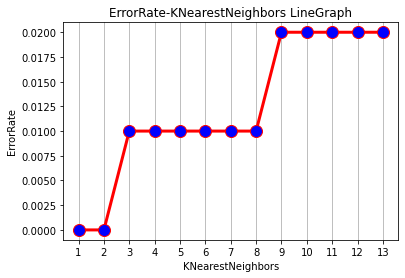

In [6]:
#导入画图工具
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
x = errorRateRef[::2]
y = errorRateRef[1::2]
ax = plt.subplot(111)
xmajorLocator = MultipleLocator(1)
ax.xaxis.set_major_locator(xmajorLocator)
ax.xaxis.grid(True, which='major')
plt.plot(x, y, linewidth=3, color='r',marker='o', markerfacecolor='blue',markersize=12)
plt.xlabel('KNearestNeighbors') 
plt.ylabel('ErrorRate') 
plt.title('ErrorRate-KNearestNeighbors LineGraph')
plt.show()